In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv("train.csv")
df.drop(columns="Unnamed: 0",inplace=True)


In [23]:
indices = df[df['age'] < 0].index
print(indices)
df.drop(indices,inplace=True)
df.reset_index(inplace=True)
df.drop(columns="index",inplace=True)

Index([5005], dtype='int64')


In [ ]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,112499.000000,112499.000000,112499.000000,112499.000000,112499.000000,9.031200e+04,112499.000000,112499.000000,112499.000000,112499.000000,109554.000000
mean,0.066845,6.264249,52.468573,0.421346,353.836220,6.328080e+03,8.462973,0.266767,1.018222,0.240678,0.757654
std,0.249755,259.630969,14.798620,4.196468,2153.230263,1.413422e+04,5.150278,4.173056,1.133213,4.158773,1.114823
min,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029677,41.000000,0.000000,0.175078,3.227136e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.153515,52.000000,0.000000,0.366291,5.112446e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.558293,63.000000,0.000000,0.857619,7.812569e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,103.000000,98.000000,329664.000000,2.866006e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
def replace_values_log(original,threshold):
    if original > threshold:
        return  np.log(np.exp(threshold) + original - threshold)
    else:
        return original

In [ ]:
def replace_values_root(original,threshold):
    if original > threshold:
        return  np.cbrt(threshold**3 + original - threshold)
    else:
        return original

In [ ]:
def inverse_replace_values_log(transformed, threshold):
    if transformed <= threshold:
        return transformed
    else:
        return np.exp(transformed) + threshold - np.exp(threshold)

In [ ]:
def inverse_replace_values_root(transformed,threshold):
    if transformed <= threshold:
        return  transformed
    else:
        return transformed**3 + threshold - threshold**3

## Using KNN on whole dataset

In [ ]:
df_imputation = df.copy()

Custom Rescaling + Min Max Scaler

In [ ]:
df_imputation['RevolvingUtilizationOfUnsecuredLines'] = df_imputation['RevolvingUtilizationOfUnsecuredLines'].apply(replace_values_root,args=(2,))
df_imputation["DebtRatio"] = df_imputation["DebtRatio"].apply(replace_values_root,args=(2,))
df_imputation["MonthlyIncome"] = np.cbrt(df_imputation["MonthlyIncome"])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,100))
df_imputation = pd.DataFrame(scaler.fit_transform(df_imputation),columns=df_imputation.columns,index=df_imputation.index)

Robust Scaler

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df_imputation = pd.DataFrame(scaler.fit_transform(df_imputation),columns=df_imputation.columns,index=df_imputation.index)

In [ ]:
df_imputation.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,112499.000000,112499.000000,112499.000000,112499.000000,112499.000000,90312.000000,112499.000000,112499.000000,112499.000000,112499.000000,109554.000000
mean,6.684504,0.924732,39.118763,0.429945,3.351920,12.132478,14.591333,0.272211,1.885597,0.245589,3.788269
std,24.975455,1.808925,17.829663,4.282111,6.471650,3.333819,8.879790,4.258221,2.098542,4.243646,5.574113
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.080176,25.301205,0.000000,0.253438,10.403515,8.620690,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.414740,38.554217,0.000000,0.530232,12.127853,13.793103,0.000000,1.851852,0.000000,0.000000
75%,0.000000,1.508296,51.807229,0.000000,1.241465,13.969224,18.965517,0.000000,3.703704,0.000000,5.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [ ]:
imputer = KNNImputer(n_neighbors=335,weights="distance")
missing_indices_income = df[df["MonthlyIncome"].isna()].index
missing_indices_dependents = df[df["NumberOfDependents"].isna()].index
df_imputed = pd.DataFrame(imputer.fit_transform(df_imputation),columns=df_imputation.columns,index=df_imputation.index)
df_imputed = pd.DataFrame(scaler.inverse_transform(df_imputed),columns=df_imputed.columns,index=df_imputed.index)

In [ ]:
df_imputed.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,112499.000000,112499.000000,112499.000000,112499.000000,112499.000000,112499.000000,112499.000000,112499.000000,112499.000000,112499.000000,112499.000000
mean,0.066845,0.342288,52.468573,0.421346,2.315547,15.079999,8.462973,0.266767,1.018222,0.240678,0.745111
std,0.249755,0.669571,14.798620,4.196468,4.470693,6.670039,5.150278,4.173056,1.133213,4.158773,1.103566
min,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029677,41.000000,0.000000,0.175078,13.100588,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.153515,52.000000,0.000000,0.366291,16.168171,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.558293,63.000000,0.000000,0.857619,19.152596,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,37.014847,103.000000,98.000000,69.081190,142.044911,58.000000,98.000000,54.000000,98.000000,20.000000


In [ ]:
df_test = df_imputed.copy()

In [ ]:
df_test['RevolvingUtilizationOfUnsecuredLines'] = df_test['RevolvingUtilizationOfUnsecuredLines'].apply(inverse_replace_values_root, args=(2,))
df_test['DebtRatio'] = df_test['DebtRatio'].apply(inverse_replace_values_root, args=(2,))
df_test["MonthlyIncome"] = df_test["MonthlyIncome"]**3

In [ ]:
df_test.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,112499.000000,112499.000000,112499.000000,112499.000000,112499.000000,1.124990e+05,112499.000000,112499.000000,112499.000000,112499.000000,112499.000000
mean,0.066845,6.264249,52.468573,0.421346,353.836220,5.314950e+03,8.462973,0.266767,1.018222,0.240678,0.745679
std,0.249755,259.630969,14.798620,4.196468,2153.230263,1.284685e+04,5.150278,4.173056,1.133213,4.158773,1.103269
min,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029677,41.000000,0.000000,0.175078,2.319086e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.153515,52.000000,0.000000,0.366291,4.224612e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.558293,63.000000,0.000000,0.857619,7.012990e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,103.000000,98.000000,329664.000000,2.866006e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [ ]:
imputed_income = df_test.loc[missing_indices_income,:]
imputed_income.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,22187.000000,22187.000000,22187.000000,22187.000000,22187.000000,22187.000000,22187.000000,22187.000000,22187.000000,22187.000000,22187.000000
mean,0.055393,7.336017,56.626899,0.602470,1689.514400,1095.761716,7.247037,0.509217,0.874386,0.478163,0.311906
std,0.228751,243.751694,15.458805,6.447955,4551.534473,1656.269016,4.872544,6.443728,1.041268,6.436026,0.759223
min,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.015585,46.000000,0.000000,122.000000,0.046703,4.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.080365,57.000000,0.000000,1159.000000,38.800821,6.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.438587,67.000000,0.000000,2385.000000,2282.426703,10.000000,0.000000,1.000000,0.000000,0.069403
max,1.000000,22198.000000,101.000000,98.000000,329664.000000,42825.849406,44.000000,98.000000,23.000000,98.000000,9.000000


In [ ]:
df.dropna().describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,90312.000000,90312.000000,90312.000000,90312.000000,90312.000000,9.031200e+04,90312.000000,90312.000000,90312.000000,90312.000000,90312.000000
mean,0.069659,6.000947,51.446995,0.376849,25.699408,6.328080e+03,8.761693,0.207204,1.053559,0.182335,0.851537
std,0.254572,263.386217,14.450004,3.422429,374.462892,1.413422e+04,5.172721,3.387384,1.151942,3.369158,1.148049
min,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.034905,41.000000,0.000000,0.143815,3.227136e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.176565,51.000000,0.000000,0.296412,5.112446e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.578295,62.000000,0.000000,0.482507,7.812569e+03,11.000000,0.000000,2.000000,0.000000,2.000000
max,1.000000,50708.000000,103.000000,98.000000,60212.000000,2.866006e+06,58.000000,98.000000,54.000000,98.000000,20.000000


(array([1.87354667e-02, 8.85837670e-05, 4.42918835e-05, 1.21802680e-04,
        4.09699922e-04, 2.51356439e-03, 2.17140959e-02, 1.75860923e-01,
        3.84137969e-01, 1.06300520e-02, 1.36197542e-03, 1.66094563e-04,
        7.75107961e-05]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8., 10., 11., 12., 13.,
        14.]),
 <BarContainer object of 13 artists>)

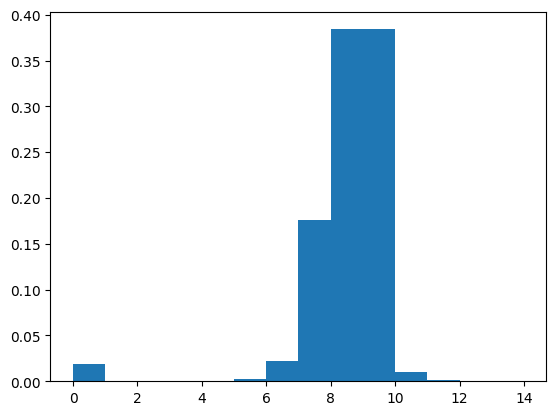

In [ ]:
plt.hist(np.log(df["MonthlyIncome"]+1),density=True,bins=[0,1,2,3,4,5,6,7,8,10,11,12,13,14])

(array([3.76752152e-01, 5.00743679e-02, 4.34939379e-02, 4.21417947e-02,
        4.02037229e-02, 4.63785099e-02, 5.97647271e-02, 1.71181322e-01,
        8.48469825e-02, 3.15500068e-04, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8., 10., 11., 12., 13.,
        14.]),
 <BarContainer object of 13 artists>)

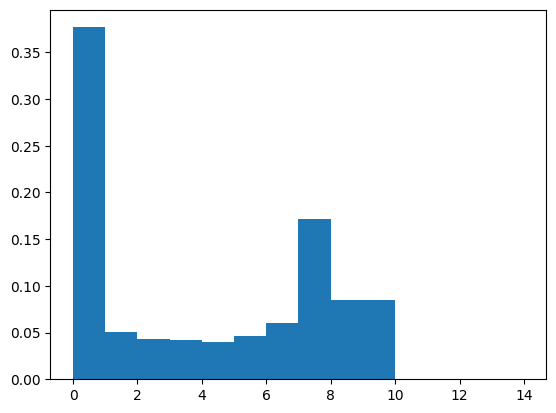

In [ ]:
plt.hist(np.log(imputed_income["MonthlyIncome"]+1),density=True,bins=[0,1,2,3,4,5,6,7,8,10,11,12,13,14])

(array([8.51174111e-01, 6.68409429e-02, 4.81362960e-02, 2.48343625e-02,
        6.62550142e-03, 1.93807184e-03, 3.60571506e-04, 0.00000000e+00,
        4.50714382e-05]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8., 10.]),
 <BarContainer object of 9 artists>)

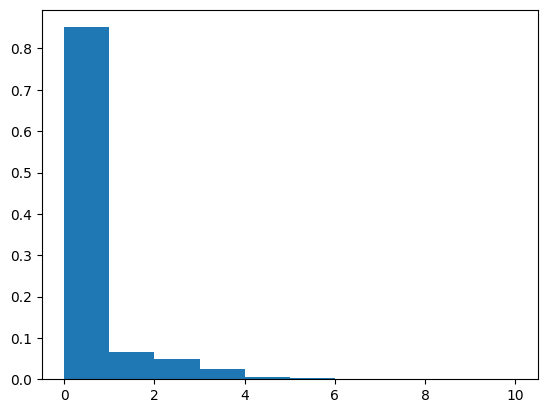

In [ ]:
plt.hist(imputed_income["NumberOfDependents"],density=True,bins=[0,1,2,3,4,5,6,7,8,10])

(array([5.94291400e-01, 1.80887964e-01, 1.33660113e-01, 6.46530478e-02,
        1.97710718e-02, 5.06599485e-03, 1.08622232e-03, 3.46860909e-04,
        9.12791865e-05, 5.47675119e-06]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8., 10., 20.]),
 <BarContainer object of 10 artists>)

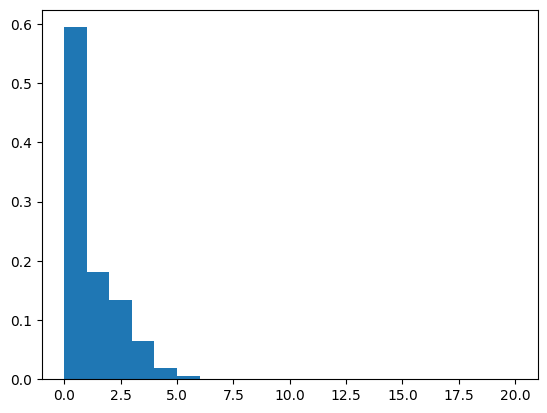

In [ ]:
plt.hist(df["NumberOfDependents"],density=True,bins=[0,1,2,3,4,5,6,7,8,10,20])

Text(0, 0.5, 'Debt Ratio')

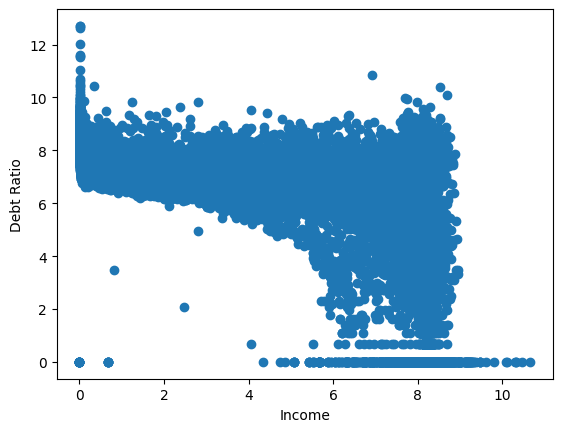

In [ ]:
plt.plot(np.log(imputed_income["MonthlyIncome"]+1),np.log(imputed_income["DebtRatio"]+1),"o")
plt.xlabel("Income")
plt.ylabel("Debt Ratio")

## MODELS

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, classification_report
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
df_test.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,112499.000000,112499.000000,112499.000000,112499.000000,112499.000000,1.124990e+05,112499.000000,112499.000000,112499.000000,112499.000000,112499.000000
mean,0.066845,6.264249,52.468573,0.421346,353.836220,5.159858e+03,8.462973,0.266767,1.018222,0.240678,0.744369
std,0.249755,259.630969,14.798620,4.196468,2153.230263,1.289015e+04,5.150278,4.173056,1.133213,4.158773,1.104101
min,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029677,41.000000,0.000000,0.175078,1.843766e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.153515,52.000000,0.000000,0.366291,4.196988e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.558293,63.000000,0.000000,0.857619,7.015103e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,103.000000,98.000000,329664.000000,2.866006e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [ ]:
df_models = df_test.copy()

In [ ]:
df_models.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,112499.000000,112499.000000,112499.000000,112499.000000,112499.000000,1.124990e+05,112499.000000,112499.000000,112499.000000,112499.000000,112499.000000
mean,0.066845,6.264249,52.468573,0.421346,353.836220,5.158192e+03,8.462973,0.266767,1.018222,0.240678,0.745607
std,0.249755,259.630969,14.798620,4.196468,2153.230263,1.289263e+04,5.150278,4.173056,1.133213,4.158773,1.103106
min,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029677,41.000000,0.000000,0.175078,1.724038e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.153515,52.000000,0.000000,0.366291,4.207875e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.558293,63.000000,0.000000,0.857619,7.026779e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,103.000000,98.000000,329664.000000,2.866006e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [ ]:
X = df_models.drop(columns="SeriousDlqin2yrs")
y = df_models["SeriousDlqin2yrs"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
#Random Undersampling
rus = RandomUnderSampler(sampling_strategy=1, random_state=42)
X_train, y_train = rus.fit_resample(X_train, y_train)

Random Forest

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=300, min_samples_split=2, min_samples_leaf=20, criterion="gini")
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=20, n_estimators=300)

In [ ]:
rf_classifier.feature_importances_

array([0.17385989, 0.11212705, 0.04514271, 0.18964821, 0.18715357,
       0.08254453, 0.09066913, 0.03047354, 0.04667066, 0.04171073])

In [ ]:
y_pred = rf_classifier.predict(X_test)
y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC Score:", auc)
print("Confusion Matrix:")
print(pd.DataFrame(conf_matrix, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1']))


Precision: 0.7068273092369478
Recall: 0.2270967741935484
F1 Score: 0.34375
AUC Score: 0.8890167526368467
Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0        20804          146
Actual 1         1198          352


XGBoost

In [ ]:
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier(booster='dart',n_estimators=100, min_child_weight=10, eta=0.1)
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster='dart', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.1, eval_metric=None,
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=10, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred = xgb_classifier.predict(X_test)
y_pred_proba = xgb_classifier.predict_proba(X_test)[:, 1]

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC Score:", auc)
print("Confusion Matrix:")
print(pd.DataFrame(conf_matrix, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1']))


Precision: 0.7182866556836903
Recall: 0.30006882312456984
F1 Score: 0.4233009708737863
AUC Score: 0.890607381486936
Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0        20876          171
Actual 1         1017          436


Hyperparameter tuning

In [ ]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 7.1 MB/s eta 0:00:00


In [ ]:
import optuna

In [ ]:
def objective(trial):
    # Define hyperparameters to optimize
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 200, 400),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_uniform('max_features', 0.1, 1.0),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
        'random_state': 42
    }

    # Train Random Forest model
    model = RandomForestClassifier(**params)
    model.fit(X_train, y_train)

    # Predict probabilities
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Compute AUC
    auc = roc_auc_score(y_test, y_pred_proba)

    return auc

# Perform hyperparameter optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Print best hyperparameters and AUC
print('Best trial:')
trial = study.best_trial
print('AUC:', trial.value)
print("Params: ")
for key, value in trial.params.items():
    print(f"    '{key}': {value}")

[I 2024-05-03 07:58:08,850] A new study created in memory with name: no-name-0720950f-76bf-42b1-b8a7-463882455836
<ipython-input-206-10d56ede7b84>:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features': trial.suggest_uniform('max_features', 0.1, 1.0),
[I 2024-05-03 07:58:21,510] Trial 0 finished with value: 0.8712828792473861 and parameters: {'n_estimators': 213, 'max_depth': 4, 'min_samples_split': 4, 'min_samples_leaf': 9, 'max_features': 0.26952922923019185, 'bootstrap': True}. Best is trial 0 with value: 0.8712828792473861.
<ipython-input-206-10d56ede7b84>:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features': trial.suggest_uniform('max_features', 0.1, 1.0),
[I 2024-05-03 07:58:55,7

KeyboardInterrupt: 

In [ ]:

# Define objective function
def objective(trial):
    # Define hyperparameters to optimize
    params = {
        'objective': 'binary:logistic',  # Binary classification with decision trees
        'eval_metric': 'auc',
        'lambda': trial.suggest_loguniform('lambda', 1e-8, 1.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-8, 1.0),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.1, 0.1),
        'n_estimators': trial.suggest_int('n_estimators', 100, 100),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 10, 30),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'random_state': 42
    }

    # Train XGBoost model
    model = XGBClassifier(**params)
    model.fit(X_train, y_train,
              eval_set=[(X_test, y_test)],
              early_stopping_rounds=100,
              verbose=False)

    # Predict probabilities
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Compute AUC
    auc = roc_auc_score(y_test, y_pred_proba)

    return auc

# Perform hyperparameter optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Print best hyperparameters and AUC
print('Best trial:')
trial = study.best_trial
print('AUC:', trial.value)
print("Params: ")
for key, value in trial.params.items():
    print(f"    '{key}': {value}")


[I 2024-05-03 07:57:54,253] A new study created in memory with name: no-name-d9ae5973-f58e-4fbb-89f4-16ec408b94e2
<ipython-input-205-469347dd00e6>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-8, 1.0),
<ipython-input-205-469347dd00e6>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-8, 1.0),
<ipython-input-205-469347dd00e6>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipy

KeyboardInterrupt: 

In [ ]:
#XGBOOST
Best trial:
AUC: 0.8935585731227011
Params:
    'lambda': 0.00953140663113647
    'alpha': 0.2133334482070224
    'subsample': 0.9933298571542742
    'colsample_bytree': 0.8615507363986599
    'learning_rate': 0.1
    'n_estimators': 100
    'max_depth': 7
    'min_child_weight': 19
    'gamma': 3.834795264696589e-06

Best trial:
AUC: 0.8928741556777668
Params:
    'lambda': 0.0008357130280643589
    'alpha': 8.181264449281005e-07
    'subsample': 0.7657702908746382
    'colsample_bytree': 0.8685879019705833
    'learning_rate': 0.1
    'n_estimators': 100
    'max_depth': 9
    'min_child_weight': 24
    'gamma': 0.030997818616159606

Best trial:
AUC: 0.8932172939607174
Params:
    'lambda': 1.0782659392923465e-08
    'alpha': 0.01510778288666515
    'subsample': 0.7424050608704292
    'colsample_bytree': 0.7177612244057845
    'learning_rate': 0.1
    'n_estimators': 100
    'max_depth': 5
    'min_child_weight': 14
    'gamma': 0.036153516078896636

Best trial: #100 trials
AUC: 0.8938858436451217
Params:
    'lambda': 6.079268205142547e-07
    'alpha': 0.00021892668462122422
    'subsample': 0.9526862071113941
    'colsample_bytree': 0.8648424148219334
    'learning_rate': 0.1
    'n_estimators': 100
    'max_depth': 6
    'min_child_weight': 18
    'gamma': 0.0002020551403166563

Best trial: #100 trials
AUC: 0.8943961234261929
Params:
    'lambda': 1.2328252577009228e-06
    'alpha': 5.884032932248047e-07
    'subsample': 0.8213018060839725
    'colsample_bytree': 0.8460168883011
    'learning_rate': 0.1
    'n_estimators': 100
    'max_depth': 6
    'min_child_weight': 15
    'gamma': 0.00018715352993792182

In [ ]:
#RANDOM FOREST

Error Analysis

In [ ]:
error = abs(y_test-y_pred_proba)
X_test["error"] = error

<Axes: >

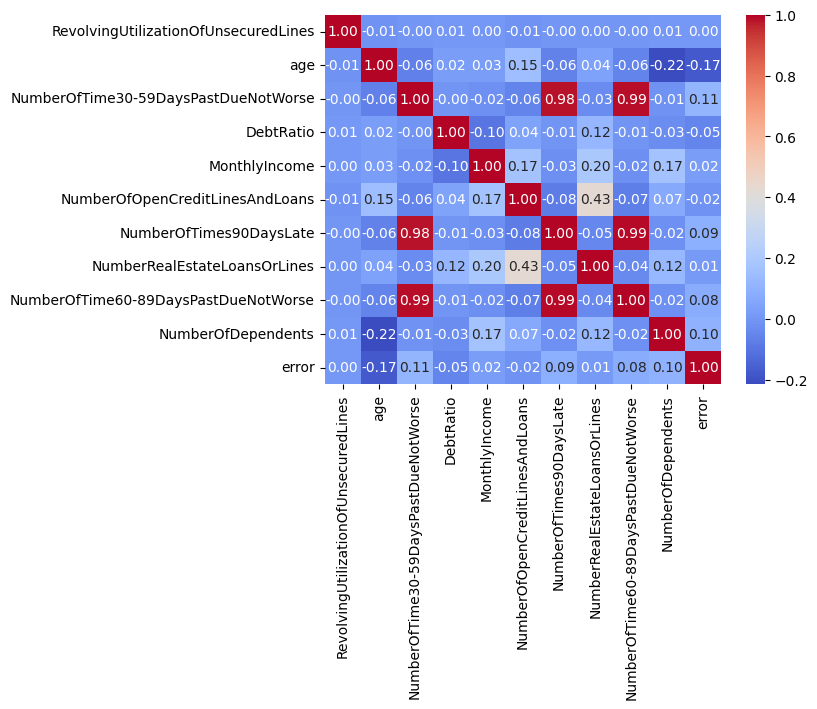

In [ ]:
sns.heatmap(X_test.corr(), annot=True, cmap='coolwarm', fmt=".2f")

In [ ]:
X_reg = X_test.drop(columns="error")
y_reg = X_test["error"]
X_train_reg,X_test_reg,y_train_reg,y_test_reg = train_test_split(X_reg,y_reg,test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error
RF_regressor = RandomForestRegressor(n_estimators=200)
RF_regressor.fit(X_train_reg,y_train_reg)

RandomForestRegressor(n_estimators=200)

In [ ]:
y_pred_reg = RF_regressor.predict(X_test_reg)
print(f"R2: {r2_score(y_test_reg,y_pred_reg)}")
print(f"MSE: {mean_squared_error(y_test_reg,y_pred_reg)}")

R2: 0.3030608192503643
MSE: 0.02674240968799061


Text(0, 0.5, 'pred')

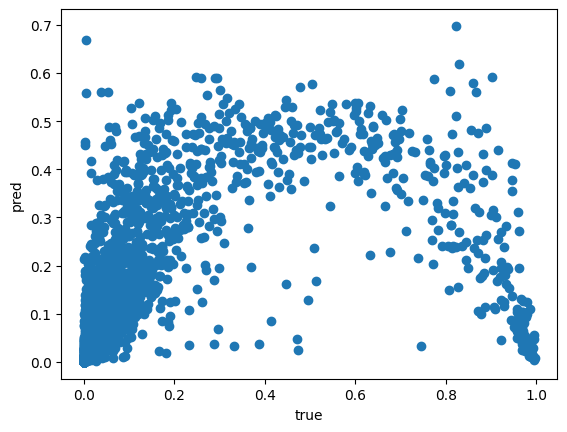

In [ ]:
plt.plot(y_test_reg,y_pred_reg,"o")
plt.xlabel("true")
plt.ylabel("pred")

In [ ]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Probability': y_pred_proba})

# Calculate errors
results['Error'] = abs(results['Actual'] - results['Probability'])

# Sort by prediction probabilities to find largest errors
largest_errors = results.sort_values(by='Error', ascending=False)

In [ ]:
largest_errors.loc[X_test[X_test["NumberOfTimes90DaysLate"]>90].index].sort_values(by='Error', ascending=False)

,Actual,Predicted,Probability,Error
53540,0.0,1.0,0.895,0.895
15058,0.0,1.0,0.865,0.865
34451,1.0,0.0,0.320,0.680
12910,0.0,1.0,0.640,0.640
39961,0.0,1.0,0.605,0.605
49339,0.0,1.0,0.585,0.585
11140,1.0,0.0,0.420,0.580
43096,1.0,0.0,0.455,0.545
64048,0.0,0.0,0.470,0.470
79031,1.0,1.0,0.535,0.465


In [ ]:
largest_errors_index = largest_errors.iloc[0:1000].index
badly_classified = df_test.loc[largest_errors_index]
badly_classified.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.075000,0.783154,45.463000,1.826000,185.950237,4178.536892,6.930000,1.345000,0.752000,1.133000,0.964000
std,0.263523,0.352795,11.721434,8.198716,752.743898,3160.750590,5.076699,8.175256,0.954677,8.171541,1.304654
min,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.636049,36.000000,0.000000,0.151951,2309.781509,3.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.918368,46.000000,1.000000,0.346047,3734.463691,6.000000,0.000000,0.000000,0.000000,0.166667
75%,0.000000,1.000000,53.000000,2.000000,0.632043,5633.934627,10.000000,1.000000,1.000000,1.000000,2.000000
max,1.000000,2.641791,82.000000,98.000000,6446.000000,43583.966377,26.000000,98.000000,9.000000,98.000000,20.000000


In [ ]:
len(badly_classified[badly_classified["NumberOfTimes90DaysLate"]>90])/len(X_test[X_test["NumberOfTimes90DaysLate"]>90])

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
11565,0.0,1.0,45.0,98.0,0.000000,3464.129829,0.0,98.0,0.0,98.0,0.000000
44837,0.0,1.0,29.0,98.0,0.000000,1531.233311,0.0,98.0,0.0,98.0,0.000000
49241,0.0,1.0,29.0,98.0,0.000000,1531.233311,0.0,98.0,0.0,98.0,0.133333
45327,0.0,1.0,23.0,98.0,0.000000,285.119548,0.0,98.0,0.0,98.0,0.000000
33925,0.0,1.0,25.0,98.0,0.000000,1458.370759,0.0,98.0,0.0,98.0,0.000000
70684,0.0,1.0,35.0,98.0,0.010934,3035.566407,0.0,98.0,0.0,98.0,0.000000
81016,0.0,1.0,20.0,98.0,0.000000,0.000000,0.0,98.0,0.0,98.0,0.000000


In [ ]:
largest_errors_index = largest_errors.iloc[0:1000].index
badly_classified = df.loc[largest_errors_index]
badly_classified.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,894.000000,1000.000000,1000.000000,1000.000000,1000.000000,994.000000
mean,0.951000,25.943942,46.179000,0.813000,248.490062,5496.580729,8.277000,0.523000,1.053000,0.415000,0.992958
std,0.215976,657.444393,12.645349,4.469005,1023.027856,4349.505373,5.822041,4.457953,1.308397,4.402972,1.240046
min,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.298048,36.000000,0.000000,0.185558,2816.081162,4.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.661545,46.000000,0.000000,0.372418,4502.655173,7.000000,0.000000,1.000000,0.000000,1.000000
75%,1.000000,0.972850,54.000000,1.000000,0.662081,6898.815038,11.000000,0.000000,2.000000,0.000000,2.000000
max,1.000000,20514.000000,92.000000,98.000000,15191.000000,46855.233962,45.000000,98.000000,13.000000,98.000000,8.000000


## Neural Network

In [ ]:
import torch
import torch.nn as nn

In [ ]:
df_nn = df_test.copy()

In [ ]:
df_nn['RevolvingUtilizationOfUnsecuredLines'] = df_nn['RevolvingUtilizationOfUnsecuredLines'].apply(replace_values_root,args=(2,))
df_nn["DebtRatio"] = df_nn["DebtRatio"].apply(replace_values_root,args=(2,))
df_nn["MonthlyIncome"] = np.cbrt(df_nn["MonthlyIncome"])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,100))
df_nn = pd.DataFrame(scaler.fit_transform(df_nn),columns=df_nn.columns,index=df_nn.index)
df_nn["SeriousDlqin2yrs"] = df_models["SeriousDlqin2yrs"]

In [ ]:
df_nn = df_models.copy()
df_nn['RevolvingUtilizationOfUnsecuredLines'] = df_nn['RevolvingUtilizationOfUnsecuredLines'].apply(replace_values_root,args=(2,))
df_nn["DebtRatio"] = df_nn["DebtRatio"].apply(replace_values_root,args=(2,))
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,20))
df_nn = pd.DataFrame(scaler.fit_transform(df_nn),columns=df_nn.columns,index=df_nn.index)
df_nn["SeriousDlqin2yrs"] = df_models["SeriousDlqin2yrs"]

In [ ]:
X = df_nn.drop(columns="SeriousDlqin2yrs")
y = df_nn["SeriousDlqin2yrs"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
rus = RandomUnderSampler(sampling_strategy=1, random_state=42)
X_train, y_train = rus.fit_resample(X_train, y_train)

In [ ]:
ros = RandomOverSampler()
X_train, y_train = ros.fit_resample(X_train, y_train)

In [ ]:
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float).unsqueeze(1)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float).unsqueeze(1)

In [ ]:
class BinaryMLP(nn.Module):
    def __init__(self, input_size, hidden_size, dropout_prob=0.3):
        super(BinaryMLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(p=dropout_prob)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(p=dropout_prob)
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.relu3 = nn.ReLU()
        self.dropout3 = nn.Dropout(p=dropout_prob)
        self.fc4 = nn.Linear(hidden_size, 1)


    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.dropout1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.dropout2(out)
        out = self.fc3(out)
        out = self.relu3(out)
        out = self.dropout3(out)
        out = self.fc4(out)
        out = torch.sigmoid(out)
        return out

In [ ]:
input_size = X_train.shape[1]
hidden_size = 64
dropout_prob = 0.3
learning_rate = 0.001

model = BinaryMLP(input_size, hidden_size,dropout_prob)
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(
    model.parameters(),
    lr=learning_rate,
    betas=(0.9, 0.999),  # Default values for the exponential decay rates for the moment estimates
    eps=1e-8,  # Default value for term added to the denominator to improve numerical stability
    weight_decay=0,  # Default value for L2 penalty (regularization term)
    amsgrad=False  # Default value for whether to use the AMSGrad variant of this algorithm
)

In [ ]:
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 50 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss:.4f}')

Epoch [50/1000], Loss: 0.2582
Epoch [100/1000], Loss: 0.2318
Epoch [150/1000], Loss: 0.2087
Epoch [200/1000], Loss: 0.1948
Epoch [250/1000], Loss: 0.1861
Epoch [300/1000], Loss: 0.1822
Epoch [350/1000], Loss: 0.1776
Epoch [400/1000], Loss: 0.1755
Epoch [450/1000], Loss: 0.1737
Epoch [500/1000], Loss: 0.1721
Epoch [550/1000], Loss: 0.1722
Epoch [600/1000], Loss: 0.1704
Epoch [650/1000], Loss: 0.1706
Epoch [700/1000], Loss: 0.1702
Epoch [750/1000], Loss: 0.1689
Epoch [800/1000], Loss: 0.1684
Epoch [850/1000], Loss: 0.1678
Epoch [900/1000], Loss: 0.1672
Epoch [950/1000], Loss: 0.1666
Epoch [1000/1000], Loss: 0.1655


In [ ]:
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    predicted = torch.round(outputs).numpy()
    y_test_np = y_test_tensor.numpy().astype(int)

    # Calculate AUC score
    auc_score = roc_auc_score(y_test_np, outputs.numpy())
    print(f"AUC Score: {auc_score:.4f}")

    # Classification report
    print("Classification Report:")
    print(classification_report(y_test_np, predicted))

AUC Score: 0.8900
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     20968
           1       0.71      0.30      0.42      1532

    accuracy                           0.94     22500
   macro avg       0.83      0.64      0.69     22500
weighted avg       0.93      0.94      0.93     22500



hyperparameter tuning

In [ ]:

def objective(trial):
    # Define hyperparameters to optimize
    hidden_size = trial.suggest_int('hidden_size', 16, 256, log=True)
    dropout_prob = trial.suggest_uniform('dropout_prob', 0.0, 0.5)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)

    # Define model, loss function, and optimizer
    model = BinaryMLP(input_size=X_train_tensor.shape[1], hidden_size=hidden_size, dropout_prob=dropout_prob)
    criterion = nn.BCELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    # Train the model
    num_epochs = 1000
    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        loss.backward()
        optimizer.step()

    # Evaluate the model
    model.eval()
    with torch.no_grad():
        outputs = model(X_test_tensor)
        auc = roc_auc_score(y_test_tensor, outputs)

    return auc


# Perform hyperparameter optimization with Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Get the best hyperparameters and their values
best_params = study.best_params
print('Best Hyperparameters:', best_params)

[I 2024-05-03 07:43:13,704] A new study created in memory with name: no-name-b2eb6d35-bf46-4973-a9a1-a7d6d7a571c9
<ipython-input-197-6c25d94338b1>:4: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_prob = trial.suggest_uniform('dropout_prob', 0.0, 0.5)
<ipython-input-197-6c25d94338b1>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
[W 2024-05-03 07:44:25,313] Trial 0 failed with parameters: {'hidden_size': 130, 'dropout_prob': 0.053699154696820295, 'learning_rate': 0.0018559225176815691} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist

KeyboardInterrupt: 

In [ ]:
# Train the model with the best hyperparameters
best_model = BinaryMLP(input_size=X_train_tensor.shape[1], **best_params)
best_model.train()

# Evaluate the best model on the test set
best_model.eval()
with torch.no_grad():
    outputs = best_model(X_test_tensor)
    test_auc = roc_auc_score(y_test_tensor, outputs)
print('Test AUC:', test_auc)
